## Linear regresion

In [1]:
import os
def import_csv(file):
    # Read the file into a DataFrame: df
    import pandas as pd
    return pd.read_csv(file)

In [2]:
# Path to the file to be imported
path = os.getcwd()

# Import the file
CO2Data = import_csv(os.path.join(path, 'Terminos_lagoon_TA_DIC_2023_RawData.csv'))


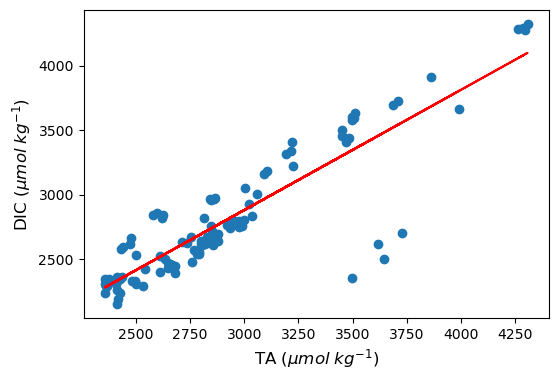

Slope: 0.9329743239047245


In [3]:
import matplotlib.pyplot as plt
from scipy import stats

x = CO2Data['ta_micromol_kg']
y = CO2Data['dic_micromol_kg']

plt.scatter(x, y, label='original data')

# Add labels and title
plt.xlabel('TA ($\mu mol  \; kg^{-1}$)', fontsize = 12, )
plt.ylabel('DIC ($\mu mol  \; kg^{-1}$)', fontsize = 12)

# Calculate the linear regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Plot linear regression 

plt.plot(x, intercept + slope*x, 'r', label='fitted line')

# set the figure size
plt.gcf().set_size_inches(6, 4)

# save the plot as a PDF file paper format 
import os
output_dir = '../output_files'
os.makedirs(output_dir, exist_ok=True)
plt.savefig(os.path.join(output_dir, 'DIC_TA_pH.pdf'), dpi=300, bbox_inches='tight')


plt.show()

print('Slope:', slope)

In [4]:
print("r-squared:", r_value**2)
print("p_value:", p_value)
print("slope:", slope)
print("intercept:", intercept)

r-squared: 0.7784247010713174
p_value: 8.179416835110045e-36
slope: 0.9329743239047245
intercept: 80.30614134209554


In [5]:
import statsmodels.api as sm
import numpy as np

# Define the independent and dependent variables
x = CO2Data['ta_micromol_kg']
y = CO2Data['dic_micromol_kg']

# Add a constant to include the intercept in the model
# This step is necessary; otherwise, the regression will be forced through the origin (intercept = 0)
x = sm.add_constant(x)

# Fit the Ordinary Least Squares (OLS) linear regression model
model = sm.OLS(y, x).fit()

# Display the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        dic_micromol_kg   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     365.4
Date:                Fri, 05 Sep 2025   Prob (F-statistic):           8.18e-36
Time:                        13:00:01   Log-Likelihood:                -728.75
No. Observations:                 106   AIC:                             1462.
Df Residuals:                     104   BIC:                             1467.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             80.3061    144.021      0.

In [6]:
print("\n=== MODEL INTERPRETATION ===\n")

# R-squared and fit quality
r2 = model.rsquared
fit_quality = (
    "✔️ Good model fit: Explains most of the variance." if r2 >= 0.7 else
    "⚠️ Moderate model fit: Explains part of the variance." if r2 >= 0.4 else
    "❌ Weak model fit: Explains little variance. Review your model."
)
print(f"R² = {r2:.3f}\n{fit_quality}")

# Coefficients and p-values
results = model.summary2().tables[1]
slope_var = results.index.drop('const')[0]  # Assuming one predictor

print("\nCoefficients:")
for var, row in results.iterrows():
    coef, pval = row['Coef.'], row['P>|t|']
    significance = "✔️ Significant (p < 0.05)" if pval < 0.05 else "⚠️ Not significant (p ≥ 0.05)"
    print(f"- {var}: Coef = {coef:.4f}, p = {pval:.4f} → {significance}")

# Slope interpretation
slope_coef, slope_pval = results.loc[slope_var, ['Coef.', 'P>|t|']]
print(f"\nSlope ({slope_var}): {slope_coef:.4f}, p = {slope_pval:.4f} → "
      f"{'✔️ Significant' if slope_pval < 0.05 else '⚠️ Not significant'}")

# Standard Error
print(f"\nStandard Error of the model: {np.sqrt(model.scale):.4f}")


=== MODEL INTERPRETATION ===

R² = 0.778
✔️ Good model fit: Explains most of the variance.

Coefficients:
- const: Coef = 80.3061, p = 0.5783 → ⚠️ Not significant (p ≥ 0.05)
- ta_micromol_kg: Coef = 0.9330, p = 0.0000 → ✔️ Significant (p < 0.05)

Slope (ta_micromol_kg): 0.9330, p = 0.0000 → ✔️ Significant

Standard Error of the model: 236.4180


## Tarea

### Salinity vs Temperature ###
Slope: -0.028458717486946162 Intercept: 27.25200067150795 R²: 0.17749929096684752 p-value: 6.879907520531155e-06


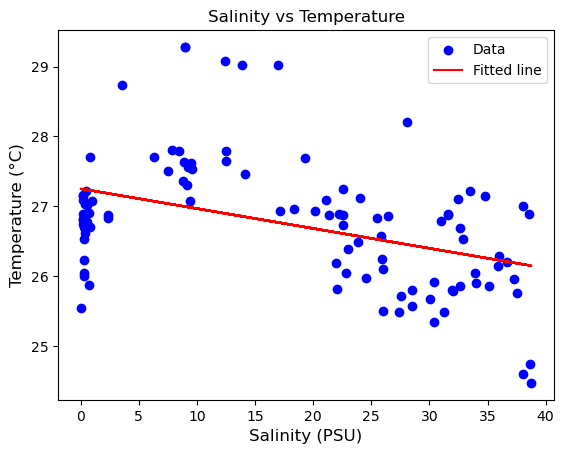

In [7]:
import matplotlib.pyplot as plt
from scipy import stats
import os

# === 1. Salinity vs Temperature ===
x1 = CO2Data['sal_psu']
y1 = CO2Data['temp_c']

plt.scatter(x1, y1, label='Data', color='blue')

# Labels
plt.xlabel('Salinity (PSU)', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.title('Salinity vs Temperature')

# Linear regression
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(x1, y1)
plt.plot(x1, intercept1 + slope1*x1, 'r', label='Fitted line')
plt.legend()

# Save
# output_dir = '../output_files'
# os.makedirs(output_dir, exist_ok=True)
# plt.gcf().set_size_inches(6, 4)
# plt.savefig(os.path.join(output_dir, 'Salinity_Temperature.pdf'), dpi=300, bbox_inches='tight')
# plt.show()

print("### Salinity vs Temperature ###")
print('Slope:', slope1, 'Intercept:', intercept1, 'R²:', r_value1**2, 'p-value:', p_value1)




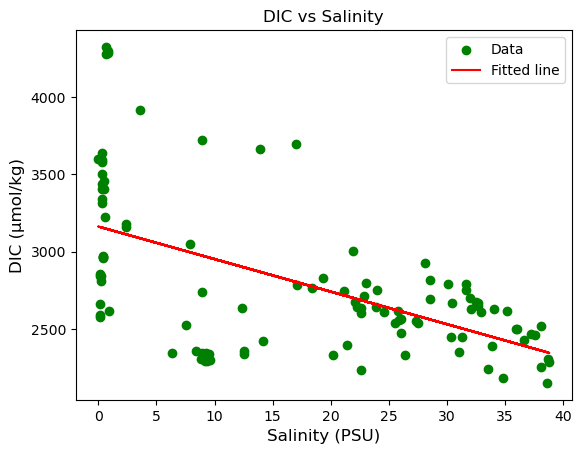


### DIC vs Salinity ###
Slope: -21.053197646779633 Intercept: 3162.874756459312 R²: 0.32710473310227767 p-value: 1.51441040237653e-10


In [8]:
# === 2. DIC vs Salinity ===
x2 = CO2Data['sal_psu']
y2 = CO2Data['dic_micromol_kg']

plt.scatter(x2, y2, label='Data', color='green')

# Labels
plt.xlabel('Salinity (PSU)', fontsize=12)
plt.ylabel('DIC (µmol/kg)', fontsize=12)
plt.title('DIC vs Salinity')

# Linear regression
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(x2, y2)
plt.plot(x2, intercept2 + slope2*x2, 'r', label='Fitted line')
plt.legend()

# Save
# plt.gcf().set_size_inches(6, 4)
# plt.savefig(os.path.join(output_dir, 'DIC_Salinity.pdf'), dpi=300, bbox_inches='tight')
plt.show()

print("\n### DIC vs Salinity ###")
print('Slope:', slope2, 'Intercept:', intercept2, 'R²:', r_value2**2, 'p-value:', p_value2)